In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
trp_2013 = pd.read_csv("./Data/2013 — 2019/2013/Divvy_Trips_2013.csv", 
                       low_memory=False)
trp_2013

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday
0,4118,2013-06-27 12:11,2013-06-27 12:16,480,316,85,Michigan Ave & Oak St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
1,4275,2013-06-27 14:44,2013-06-27 14:45,77,64,32,Racine Ave & Congress Pkwy,32,Racine Ave & Congress Pkwy,Customer,NaN,NaN
2,4291,2013-06-27 14:58,2013-06-27 15:05,77,433,32,Racine Ave & Congress Pkwy,19,Loomis St & Taylor St,Customer,NaN,NaN
3,4316,2013-06-27 15:06,2013-06-27 15:09,77,123,19,Loomis St & Taylor St,19,Loomis St & Taylor St,Customer,NaN,NaN
4,4342,2013-06-27 15:13,2013-06-27 15:27,77,852,19,Loomis St & Taylor St,55,Halsted St & James M Rochford St,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
759783,1109257,2013-12-31 21:12,2013-12-31 21:16,1917,284,20,Sheffield Ave & Kingsbury St,93,Sheffield Ave & Willow St,Subscriber,Female,1983.0
759784,1109276,2013-12-31 21:36,2013-12-31 22:01,2859,1493,227,Southport Ave & Waveland Ave,228,Damen Ave & Melrose Ave,Subscriber,Female,1978.0
759785,1109283,2013-12-31 22:03,2013-12-31 22:13,198,650,284,Michigan Ave & Jackson Blvd,43,Michigan Ave & Washington St,Subscriber,Female,1976.0
759786,1109309,2013-12-31 22:10,2013-12-31 22:16,2048,346,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Female,1976.0


In [208]:
trp_2013.starttime = pd.to_datetime(trp_2013.starttime, format="%Y-%m-%d %H:%M")

In [209]:
trp_2013.stoptime = pd.to_datetime(trp_2013.stoptime, format="%Y-%m-%d %H:%M")

In [210]:
trp_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759788 entries, 0 to 759787
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            759788 non-null  int64         
 1   starttime          759788 non-null  datetime64[ns]
 2   stoptime           759788 non-null  datetime64[ns]
 3   bikeid             759788 non-null  int64         
 4   tripduration       759788 non-null  int64         
 5   from_station_id    759788 non-null  int64         
 6   from_station_name  759788 non-null  object        
 7   to_station_id      759788 non-null  int64         
 8   to_station_name    759788 non-null  object        
 9   usertype           759788 non-null  object        
 10  gender             403046 non-null  object        
 11  birthday           402909 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 69.6+ MB


<AxesSubplot:>

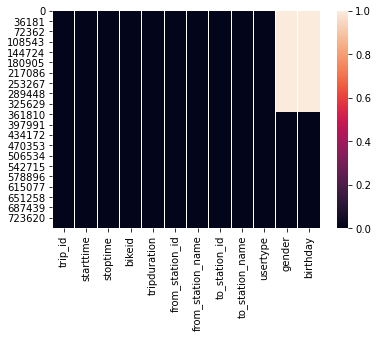

In [211]:
sns.heatmap(trp_2013.isna())

The birthyear is missing in the starting of rows.

In [212]:
# Overall user number
trp_2013.usertype.value_counts()

Subscriber    403036
Customer      356752
Name: usertype, dtype: int64

In [64]:
trp_2013[trp_2013.birthday.isna()].usertype.value_counts()

Customer      356728
Subscriber       151
Name: usertype, dtype: int64

This ↑ means that almost all users who are not SUBSCRIBER doesn't have the birth year registered.

In [65]:
trp_2013.trip_id.is_unique

True

In [213]:
#DONE
trp_2013 = trp_2013.sort_values(by="starttime").reset_index(drop=True)

In [214]:
stn_2013 = pd.read_csv("./Data/2013 — 2019/2013/Divvy_Stations_2013.csv", 
                       low_memory=False)
stn_2013

,id,name,latitude,longitude,dpcapacity,landmark,online date
0,5,State St & Harrison St,41.873958,-87.627739,19,30,6/28/2013
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,66,6/28/2013
2,14,Morgan St & 18th St,41.858086,-87.651073,15,163,6/28/2013
3,15,Racine Ave & 18th St,41.858181,-87.656487,15,164,6/28/2013
4,16,Wood St & North Ave,41.910329,-87.672516,15,223,8/12/2013
...,...,...,...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700,15,319,10/12/2013
296,348,California Ave & 21st St,41.854016,-87.695445,15,96,10/14/2013
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077,15,210,10/28/2013
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747,15,247,10/22/2013


In [215]:
stn_2013.id.is_unique

True

In [216]:
stn_2013[['latitude', 'longitude']].duplicated().sum()

0

The station info is unique. And cleaned.

In [217]:
stn_2013["online date"] = pd.to_datetime(stn_2013["online date"], format="%m/%d/%Y")

In [218]:
merged_2013 = pd.merge(trp_2013, stn_2013[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2013[['id', 'name']], left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y"], axis=1)

In [219]:
merged_2013

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthday,name_x,name_y
0,3940,2013-06-27 01:06:00,2013-06-27 09:46:00,914,31177,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,Subscriber,Male,1982.0,Clinton St & Washington Blvd,Larrabee St & Kingsbury St
1,38683,2013-07-08 17:23:00,2013-07-08 17:30:00,236,388,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,Subscriber,Male,1980.0,Clinton St & Washington Blvd,Larrabee St & Kingsbury St
2,42540,2013-07-09 17:53:00,2013-07-09 18:05:00,236,712,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,Customer,NaN,NaN,Clinton St & Washington Blvd,Larrabee St & Kingsbury St
3,48665,2013-07-11 13:25:00,2013-07-11 13:38:00,375,781,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,Customer,NaN,NaN,Clinton St & Washington Blvd,Larrabee St & Kingsbury St
4,51500,2013-07-12 08:26:00,2013-07-12 08:38:00,221,669,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,Customer,NaN,NaN,Clinton St & Washington Blvd,Larrabee St & Kingsbury St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759783,525506,2013-09-18 15:14:00,2013-09-18 15:43:00,151,1768,263,Rhodes Ave & 32nd St,271,Cottage Grove Ave & 43rd St,Customer,NaN,NaN,Rhodes Ave & 32nd St,Cottage Grove Ave & 43rd St
759784,525507,2013-09-18 15:14:00,2013-09-18 15:43:00,1996,1749,263,Rhodes Ave & 32nd St,271,Cottage Grove Ave & 43rd St,Customer,NaN,NaN,Rhodes Ave & 32nd St,Cottage Grove Ave & 43rd St
759785,621982,2013-09-28 17:15:00,2013-09-28 17:18:00,1948,205,265,Cottage Grove Ave & Oakwood Blvd,271,Cottage Grove Ave & 43rd St,Subscriber,Male,1964.0,Cottage Grove Ave & Oakwood Blvd,Cottage Grove Ave & 43rd St
759786,682009,2013-10-04 18:24:00,2013-10-04 18:29:00,2136,293,265,Cottage Grove Ave & Oakwood Blvd,271,Cottage Grove Ave & 43rd St,Subscriber,Male,1964.0,Cottage Grove Ave & Oakwood Blvd,Cottage Grove Ave & 43rd St


In [220]:
trp_2013.shape[0] == (merged_2013.from_station_name == merged_2013.name_x).sum()

True

In [221]:
trp_2013.shape[0] == (merged_2013.to_station_name == merged_2013.name_y).sum()

True

In [222]:
merged_2013 = pd.merge(trp_2013, stn_2013, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2013, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "online date_x", "online date_y", "dpcapacity_x", "landmark_x", "dpcapacity_y", "landmark_y"], axis=1)

In [223]:
merged_2013.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [224]:
merged_2013 = merged_2013.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype', 'gender', 'birthday'], axis=1)

Now we have the data of 2013 is ready at our disposal. We will now take a look at another stuff — 2014

# 

In [226]:
# Dropping (not considering the birth year or gender as they are the Subscriber specific.)
merged_2013.drop(["gender", "birthday"], axis= 1, inplace=True)

In [229]:
merged_2013 = merged_2013.sort_values(by="starttime")

In [231]:
merged_2013

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,3940,2013-06-27 01:06:00,2013-06-27 09:46:00,914,31177,91,Clinton St & Washington Blvd,48,Larrabee St & Kingsbury St,41.883380,-87.641170,41.897764,-87.642884,Subscriber
137239,4113,2013-06-27 11:09:00,2013-06-27 11:11:00,711,140,88,May St & Randolph St,88,May St & Randolph St,41.883970,-87.655688,41.883970,-87.655688,Subscriber
137240,4119,2013-06-27 11:12:00,2013-06-27 11:13:00,711,87,88,May St & Randolph St,88,May St & Randolph St,41.883970,-87.655688,41.883970,-87.655688,Subscriber
335327,4134,2013-06-27 11:24:00,2013-06-27 14:38:00,145,11674,17,Wood St & Division St,61,Wood St & Milwaukee Ave,41.903320,-87.672730,41.907655,-87.672552,Subscriber
364736,4162,2013-06-27 11:39:00,2013-06-27 16:01:00,711,15758,88,May St & Randolph St,34,Cannon Dr & Fullerton Ave,41.883970,-87.655688,41.926756,-87.634429,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238442,1109336,2013-12-31 22:29:00,2013-12-31 22:35:00,788,368,169,Canal St & Harrison St,77,Clinton St & Madison St,41.874337,-87.639566,41.881582,-87.641277,Subscriber
265203,1109338,2013-12-31 22:35:00,2013-12-31 22:49:00,2239,868,216,California Ave & Division St,69,Damen Ave & Pierce Ave,41.903029,-87.697474,41.909396,-87.677692,Subscriber
373359,1109369,2013-12-31 23:07:00,2013-12-31 23:31:00,1536,1492,22,May St & Taylor St,22,May St & Taylor St,41.869482,-87.655486,41.869482,-87.655486,Subscriber
555164,1109392,2013-12-31 23:36:00,2013-12-31 23:46:00,2069,600,120,Wentworth Ave & Archer Ave,135,Halsted St & 21st St,41.854564,-87.631937,41.853780,-87.646650,Subscriber


In [233]:
# merged_2013.to_csv("Data/CLEANED - YearWise/2013.csv", index=False)

# 

# 2014

___
### Q1Q2

In [178]:
trp_2014_Q1Q2 = pd.read_csv("./Data/2013 — 2019/2014/Divvy_Stations_Trips_2014_Q1Q2/Divvy_Trips_2014_Q1Q2.csv", 
                           low_memory=False)
trp_2014_Q1Q2.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2355134,6/30/2014 23:57,7/1/2014 0:07,2006,604,131,Lincoln Ave & Belmont Ave,303,Broadway & Cornelia Ave,Subscriber,Male,1988.0
1,2355133,6/30/2014 23:56,7/1/2014 0:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0
2,2355130,6/30/2014 23:33,6/30/2014 23:35,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
3,2355129,6/30/2014 23:26,7/1/2014 0:24,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
4,2355128,6/30/2014 23:16,6/30/2014 23:26,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0


In [179]:
trp_2014_Q1Q2.starttime = pd.to_datetime(trp_2014_Q1Q2.starttime, format="%m/%d/%Y %H:%M")

In [180]:
trp_2014_Q1Q2.stoptime = pd.to_datetime(trp_2014_Q1Q2.stoptime, format="%m/%d/%Y %H:%M")

In [181]:
trp_2014_Q1Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905699 entries, 0 to 905698
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            905699 non-null  int64         
 1   starttime          905699 non-null  datetime64[ns]
 2   stoptime           905699 non-null  datetime64[ns]
 3   bikeid             905699 non-null  int64         
 4   tripduration       905699 non-null  int64         
 5   from_station_id    905699 non-null  int64         
 6   from_station_name  905699 non-null  object        
 7   to_station_id      905699 non-null  int64         
 8   to_station_name    905699 non-null  object        
 9   usertype           905699 non-null  object        
 10  gender             591677 non-null  object        
 11  birthyear          591722 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 82.9+ MB


<AxesSubplot:>

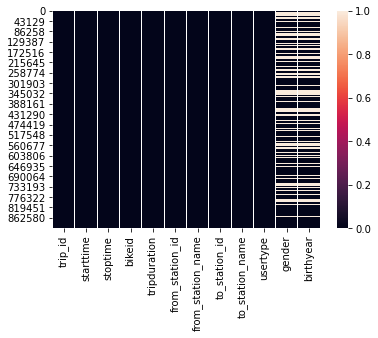

In [182]:
sns.heatmap(trp_2014_Q1Q2.isna())

The birthyear is missing in the starting of rows.

In [183]:
# Overall user number
trp_2014_Q1Q2.usertype.value_counts()

Subscriber    591711
Customer      313988
Name: usertype, dtype: int64

In [184]:
trp_2014_Q1Q2[trp_2014_Q1Q2.birthyear.isna()].usertype.value_counts()

Customer    313977
Name: usertype, dtype: int64

This ↑ means that almost all users who are not SUBSCRIBER doesn't have the birth year registered.

In [185]:
trp_2014_Q1Q2.trip_id.is_unique

True

In [186]:
#DONE
trp_2014_Q1Q2 = trp_2014_Q1Q2.sort_values(by="starttime").reset_index(drop=True)

In [187]:
trp_2014_Q1Q2

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,1109420,2014-01-01 00:17:00,2014-01-01 00:42:00,2981,1466,94,Clark St & Armitage Ave,69,Damen Ave & Pierce Ave,Customer,NaN,NaN
1,1109421,2014-01-01 00:45:00,2014-01-01 00:55:00,2981,608,69,Damen Ave & Pierce Ave,216,California Ave & Division St,Customer,NaN,NaN
2,1109427,2014-01-01 01:12:00,2014-01-01 01:18:00,1818,346,240,Sheridan Rd & Irving Park Rd,245,Clarendon Ave & Junior Ter,Subscriber,Male,1961.0
3,1109433,2014-01-01 01:43:00,2014-01-01 01:54:00,90,612,127,Lincoln Ave & Fullerton Ave,332,Halsted St & Diversey Pkwy,Customer,NaN,NaN
4,1109431,2014-01-01 01:43:00,2014-01-01 01:53:00,348,650,113,Bissell St & Armitage Ave,94,Clark St & Armitage Ave,Subscriber,Male,1988.0
...,...,...,...,...,...,...,...,...,...,...,...,...
905694,2355128,2014-06-30 23:16:00,2014-06-30 23:26:00,173,638,320,Loomis St & Lexington St,134,Peoria St & Jackson Blvd,Subscriber,Female,1988.0
905695,2355129,2014-06-30 23:26:00,2014-07-01 00:24:00,173,3481,134,Peoria St & Jackson Blvd,194,State St & Wacker Dr,Subscriber,Female,1988.0
905696,2355130,2014-06-30 23:33:00,2014-06-30 23:35:00,2798,126,327,Sheffield Ave & Webster Ave,225,Halsted St & Dickens Ave,Subscriber,Male,1993.0
905697,2355133,2014-06-30 23:56:00,2014-07-01 00:00:00,2217,263,282,Halsted St & Maxwell St,22,May St & Taylor St,Subscriber,Male,1992.0


In [188]:
stn_2014_Q1Q2 = pd.read_excel("./Data/2013 — 2019/2014/Divvy_Stations_Trips_2014_Q1Q2/Divvy_Stations_2014-Q1Q2.xlsx")
stn_2014_Q1Q2

,id,name,latitude,longitude,dpcapacity,online date
0,43,Michigan Ave & Washington St,41.883893,-87.624649,43,2013-06-16
1,44,State St & Randolph St,41.884730,-87.627734,27,2013-06-16
2,33,State St & Van Buren St,41.877181,-87.627844,27,2013-06-25
3,199,Wabash Ave & Grand Ave,41.891738,-87.626937,15,2013-08-10
4,51,Clark St & Randolph St,41.884576,-87.631890,31,2013-06-17
...,...,...,...,...,...,...
295,181,LaSalle St & Illinois St,41.890749,-87.632060,31,2013-07-21
296,341,Adler Planetarium,41.866095,-87.607267,19,2013-10-09
297,285,Wood St & Grand Ave,41.891130,-87.672030,15,2013-09-13
298,277,Ashland Ave & Grand Ave,41.891072,-87.666611,15,2013-09-12


In [189]:
stn_2014_Q1Q2.id.is_unique

True

In [190]:
stn_2014_Q1Q2[['latitude', 'longitude']].duplicated().sum()

0

The station info is unique. And cleaned.

In [191]:
merged_2014_Q1Q2 = pd.merge(trp_2014_Q1Q2, stn_2014_Q1Q2[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                     .merge(stn_2014_Q1Q2[['id', 'name']], left_on='to_station_id', right_on='id') \
                    .drop(["id_x", "id_y"], axis=1)

In [192]:
trp_2014_Q1Q2.shape[0] == (merged_2014_Q1Q2.from_station_name == merged_2014_Q1Q2.name_x).sum()

True

In [193]:
trp_2014_Q1Q2.shape[0] == (merged_2014_Q1Q2.to_station_name == merged_2014_Q1Q2.name_y).sum()

True

In [194]:
# Finally mergning
merged_2014_Q1Q2 = pd.merge(trp_2014_Q1Q2, stn_2014_Q1Q2, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2014_Q1Q2, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "online date_x", "online date_y", "dpcapacity_x", "dpcapacity_y", "gender", "birthyear"], axis=1)

In [195]:
merged_2014_Q1Q2.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [196]:
merged_2014_Q1Q2 = merged_2014_Q1Q2.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype'], axis=1)

In [197]:
merged_2014_Q1Q2

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,1109420,2014-01-01 00:17:00,2014-01-01 00:42:00,2981,1466,94,Clark St & Armitage Ave,69,Damen Ave & Pierce Ave,41.918306,-87.636282,41.909396,-87.677692,Customer
1,1251390,2014-03-14 19:53:00,2014-03-14 20:10:00,869,1007,94,Clark St & Armitage Ave,69,Damen Ave & Pierce Ave,41.918306,-87.636282,41.909396,-87.677692,Subscriber
2,1279354,2014-03-21 18:39:00,2014-03-21 18:58:00,68,1146,94,Clark St & Armitage Ave,69,Damen Ave & Pierce Ave,41.918306,-87.636282,41.909396,-87.677692,Customer
3,1292318,2014-03-25 22:27:00,2014-03-25 22:42:00,2046,847,94,Clark St & Armitage Ave,69,Damen Ave & Pierce Ave,41.918306,-87.636282,41.909396,-87.677692,Subscriber
4,1318509,2014-03-31 18:29:00,2014-03-31 18:46:00,441,988,94,Clark St & Armitage Ave,69,Damen Ave & Pierce Ave,41.918306,-87.636282,41.909396,-87.677692,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905694,1916079,2014-06-01 16:08:00,2014-06-01 16:15:00,2661,446,200,King Dr & 47th St,336,Cottage Grove Ave & 47th St,41.809851,-87.616279,41.809855,-87.606755,Subscriber
905695,2025708,2014-06-08 19:25:00,2014-06-08 19:31:00,2130,397,200,King Dr & 47th St,336,Cottage Grove Ave & 47th St,41.809851,-87.616279,41.809855,-87.606755,Subscriber
905696,2111292,2014-06-14 23:44:00,2014-06-14 23:52:00,1561,484,200,King Dr & 47th St,336,Cottage Grove Ave & 47th St,41.809851,-87.616279,41.809855,-87.606755,Subscriber
905697,2342796,2014-06-29 23:56:00,2014-06-30 00:02:00,1642,391,200,King Dr & 47th St,336,Cottage Grove Ave & 47th St,41.809851,-87.616279,41.809855,-87.606755,Subscriber


____

### Q3Q4

07 - Month

In [114]:
trp_2014_Q307 = pd.read_csv("Data/2013 — 2019/2014/Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-07.csv", 
                           low_memory=False)
trp_2014_Q307.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2886259,7/31/2014 23:56,8/1/2014 0:03,2602,386,291,Wells St & Evergreen Ave,53,Wells St & Erie St,Subscriber,Female,1979.0
1,2886258,7/31/2014 23:58,8/1/2014 0:07,2403,495,98,LaSalle St & Washington St,106,State St & Pearson St,Subscriber,Male,1974.0
2,2886257,7/31/2014 23:58,8/1/2014 2:10,669,7947,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN
3,2886256,7/31/2014 23:58,8/1/2014 0:19,2431,1282,47,State St & Kinzie St,14,Morgan St & 18th St,Customer,NaN,NaN
4,2886255,7/31/2014 23:57,8/1/2014 2:10,2885,7972,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN


In [116]:
trp_2014_Q307.starttime = pd.to_datetime(trp_2014_Q307.starttime, format="%m/%d/%Y %H:%M")

In [117]:
trp_2014_Q307.stoptime = pd.to_datetime(trp_2014_Q307.stoptime, format="%m/%d/%Y %H:%M")

In [121]:
# Overall user number
trp_2014_Q307.usertype.value_counts()

Subscriber    251784
Customer      158556
Name: usertype, dtype: int64

In [122]:
trp_2014_Q307[trp_2014_Q307.birthyear.isna()].usertype.value_counts()

Customer      158551
Subscriber        44
Name: usertype, dtype: int64

This ↑ means that almost all users who are not SUBSCRIBER doesn't have the birth year registered.

In [123]:
trp_2014_Q307.trip_id.is_unique

True

In [124]:
#DONE
trp_2014_Q307 = trp_2014_Q307.sort_values(by="starttime").reset_index(drop=True)

In [126]:
trp_2014_Q307

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2355136,2014-07-01 00:16:00,2014-07-01 00:29:00,255,836,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Subscriber,Female,1978.0
1,2355139,2014-07-01 00:24:00,2014-07-01 00:42:00,709,1040,49,Dearborn St & Monroe St,26,McClurg Ct & Illinois St,Customer,NaN,NaN
2,2355140,2014-07-01 00:26:00,2014-07-01 00:57:00,173,1839,194,Wabash Ave & Wacker Pl,300,Broadway & Barry Ave,Subscriber,Female,1988.0
3,2355142,2014-07-01 00:35:00,2014-07-01 00:41:00,1432,353,342,Wolcott Ave & Polk St,214,Damen Ave & Grand Ave,Subscriber,Male,1980.0
4,2355143,2014-07-01 00:41:00,2014-07-01 00:47:00,891,393,69,Damen Ave & Pierce Ave,214,Damen Ave & Grand Ave,Subscriber,Male,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...
410335,2886254,2014-07-31 23:57:00,2014-08-01 02:28:00,2307,9067,28,Larrabee St & Menomonee St,28,Larrabee St & Menomonee St,Customer,NaN,NaN
410336,2886255,2014-07-31 23:57:00,2014-08-01 02:10:00,2885,7972,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN
410337,2886256,2014-07-31 23:58:00,2014-08-01 00:19:00,2431,1282,47,State St & Kinzie St,14,Morgan St & 18th St,Customer,NaN,NaN
410338,2886257,2014-07-31 23:58:00,2014-08-01 02:10:00,669,7947,240,Sheridan Rd & Irving Park Rd,240,Sheridan Rd & Irving Park Rd,Customer,NaN,NaN


08 and 09 - Month

In [127]:
trp_2014_Q30809 = pd.read_csv("Data/2013 — 2019/2014/Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q3-0809.csv", 
                           low_memory=False)
trp_2014_Q30809.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,3810750,9/30/2014 23:59,10/1/2014 0:06,851,411,177,Theater on the Lake,143,Sedgwick St & Webster Ave,Subscriber,Male,1982.0
1,3810749,9/30/2014 23:59,10/1/2014 0:01,989,142,277,Ashland Ave & Grand Ave,285,Wood St & Grand Ave,Subscriber,Male,1983.0
2,3810748,9/30/2014 23:59,10/1/2014 0:03,261,279,48,Larrabee St & Kingsbury St,110,State St & Erie St,Subscriber,Male,1988.0
3,3810746,9/30/2014 23:58,10/1/2014 0:15,806,1031,58,Marshfield Ave & Cortland St,318,Southport Ave & Irving Park Rd,Customer,NaN,NaN
4,3810745,9/30/2014 23:58,10/1/2014 0:05,104,437,127,Lincoln Ave & Fullerton Ave,94,Clark St & Armitage Ave,Subscriber,Male,1957.0


In [128]:
trp_2014_Q30809.starttime = pd.to_datetime(trp_2014_Q30809.starttime, format="%m/%d/%Y %H:%M")

In [129]:
trp_2014_Q30809.stoptime = pd.to_datetime(trp_2014_Q30809.stoptime, format="%m/%d/%Y %H:%M")

In [130]:
# Overall user number
trp_2014_Q30809.usertype.value_counts()

Subscriber    451508
Customer      249122
Name: usertype, dtype: int64

In [131]:
trp_2014_Q30809[trp_2014_Q30809.birthyear.isna()].usertype.value_counts()

Customer      249061
Subscriber        29
Name: usertype, dtype: int64

This ↑ means that almost all users who are not SUBSCRIBER doesn't have the birth year registered.

In [132]:
trp_2014_Q30809.trip_id.is_unique

True

In [133]:
#DONE
trp_2014_Q30809 = trp_2014_Q30809.sort_values(by="starttime").reset_index(drop=True)
trp_2014_Q30809

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2886260,2014-08-01 00:00:00,2014-08-01 00:11:00,2887,696,251,Clarendon Ave & Leland Ave,299,Halsted St & Roscoe St,Subscriber,Male,1983.0
1,2886263,2014-08-01 00:00:00,2014-08-01 00:13:00,1452,797,330,Lincoln Ave & Addison St,239,Western Ave & Leland Ave,Subscriber,Male,1977.0
2,2886261,2014-08-01 00:00:00,2014-08-01 00:05:00,1645,299,166,Ashland Ave & Wrightwood Ave,152,Lincoln Ave & Diversey Pkwy,Subscriber,Male,1995.0
3,2886262,2014-08-01 00:00:00,2014-08-01 00:20:00,334,1172,310,Damen Ave & Charleston St,113,Bissell St & Armitage Ave,Customer,NaN,NaN
4,2886266,2014-08-01 00:01:00,2014-08-01 00:43:00,6,2473,118,Sedgwick St & North Ave,118,Sedgwick St & North Ave,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
700625,3810745,2014-09-30 23:58:00,2014-10-01 00:05:00,104,437,127,Lincoln Ave & Fullerton Ave,94,Clark St & Armitage Ave,Subscriber,Male,1957.0
700626,3810746,2014-09-30 23:58:00,2014-10-01 00:15:00,806,1031,58,Marshfield Ave & Cortland St,318,Southport Ave & Irving Park Rd,Customer,NaN,NaN
700627,3810748,2014-09-30 23:59:00,2014-10-01 00:03:00,261,279,48,Larrabee St & Kingsbury St,110,State St & Erie St,Subscriber,Male,1988.0
700628,3810749,2014-09-30 23:59:00,2014-10-01 00:01:00,989,142,277,Ashland Ave & Grand Ave,285,Wood St & Grand Ave,Subscriber,Male,1983.0


Q4

In [134]:
trp_2014_Q4 = pd.read_csv("Data/2013 — 2019/2014/Divvy_Stations_Trips_2014_Q3Q4/Divvy_Trips_2014-Q4.csv", 
                           low_memory=False)
trp_2014_Q4.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4413167,12/31/2014 23:54,12/31/2014 23:57,1880,193,296,Broadway & Belmont Ave,334,Lake Shore Dr & Belmont Ave,Subscriber,Male,1989.0
1,4413166,12/31/2014 23:50,12/31/2014 23:52,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0
2,4413165,12/31/2014 23:48,1/1/2015 0:38,1946,3002,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Customer,NaN,NaN
3,4413164,12/31/2014 23:46,1/1/2015 0:37,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0
4,4413163,12/31/2014 23:44,1/1/2015 0:10,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0


In [135]:
trp_2014_Q4.starttime = pd.to_datetime(trp_2014_Q4.starttime, format="%m/%d/%Y %H:%M")

In [136]:
trp_2014_Q4.stoptime = pd.to_datetime(trp_2014_Q4.stoptime, format="%m/%d/%Y %H:%M")

In [137]:
# Overall user number
trp_2014_Q4.usertype.value_counts()

Subscriber    368391
Customer       69574
Name: usertype, dtype: int64

In [138]:
trp_2014_Q4[trp_2014_Q4.birthyear.isna()].usertype.value_counts()

Customer      69549
Subscriber        5
Name: usertype, dtype: int64

This ↑ means that almost all users who are not SUBSCRIBER doesn't have the birth year registered.

In [140]:
trp_2014_Q4.trip_id.is_unique

True

In [141]:
#DONE
trp_2014_Q4 = trp_2014_Q4.sort_values(by="starttime").reset_index(drop=True)
trp_2014_Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,3810751,2014-10-01 00:00:00,2014-10-01 00:09:00,1316,538,52,Michigan Ave & Lake St,255,Indiana Ave & Roosevelt Rd,Subscriber,Male,1980.0
1,3810756,2014-10-01 00:01:00,2014-10-01 00:16:00,1122,853,253,Clifton Ave & Lawrence Ave,114,Sheffield Ave & Addison St,Subscriber,Male,1980.0
2,3810752,2014-10-01 00:01:00,2014-10-01 00:05:00,2059,238,92,Carpenter St & Huron St,29,Noble St & Milwaukee Ave,Subscriber,Male,1986.0
3,3810753,2014-10-01 00:02:00,2014-10-01 00:16:00,2707,836,332,Halsted St & Diversey Pkwy,333,Ashland Ave & Blackhawk St,Subscriber,Male,1985.0
4,3810754,2014-10-01 00:02:00,2014-10-01 00:10:00,1531,468,113,Bissell St & Armitage Ave,340,Clark St & Wrightwood Ave,Subscriber,Male,1985.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437960,4413163,2014-12-31 23:44:00,2015-01-01 00:10:00,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0
437961,4413164,2014-12-31 23:46:00,2015-01-01 00:37:00,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0
437962,4413165,2014-12-31 23:48:00,2015-01-01 00:38:00,1946,3002,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Customer,NaN,NaN
437963,4413166,2014-12-31 23:50:00,2014-12-31 23:52:00,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0


Now we have `trp_2014_Q307` + `trp_2014_Q30809` + `trp_2014_Q4` - Now we can make a "trp_2014"

In [149]:
trp_2014_Q3Q4 = pd.concat([trp_2014_Q307, trp_2014_Q30809, trp_2014_Q4])
trp_2014_Q3Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2355136,2014-07-01 00:16:00,2014-07-01 00:29:00,255,836,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Subscriber,Female,1978.0
1,2355139,2014-07-01 00:24:00,2014-07-01 00:42:00,709,1040,49,Dearborn St & Monroe St,26,McClurg Ct & Illinois St,Customer,NaN,NaN
2,2355140,2014-07-01 00:26:00,2014-07-01 00:57:00,173,1839,194,Wabash Ave & Wacker Pl,300,Broadway & Barry Ave,Subscriber,Female,1988.0
3,2355142,2014-07-01 00:35:00,2014-07-01 00:41:00,1432,353,342,Wolcott Ave & Polk St,214,Damen Ave & Grand Ave,Subscriber,Male,1980.0
4,2355143,2014-07-01 00:41:00,2014-07-01 00:47:00,891,393,69,Damen Ave & Pierce Ave,214,Damen Ave & Grand Ave,Subscriber,Male,1979.0
...,...,...,...,...,...,...,...,...,...,...,...,...
437960,4413163,2014-12-31 23:44:00,2015-01-01 00:10:00,389,1570,43,Michigan Ave & Washington St,163,Damen Ave & Clybourn Ave,Subscriber,Male,1983.0
437961,4413164,2014-12-31 23:46:00,2015-01-01 00:37:00,2563,3084,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Subscriber,Male,1987.0
437962,4413165,2014-12-31 23:48:00,2015-01-01 00:38:00,1946,3002,168,Michigan Ave & 14th St,168,Michigan Ave & 14th St,Customer,NaN,NaN
437963,4413166,2014-12-31 23:50:00,2014-12-31 23:52:00,1153,161,264,Stetson Ave & South Water St,44,State St & Randolph St,Subscriber,Male,1984.0


Loading the Stations for 2014 Q3Q4

In [158]:
stn_2014_Q3Q4 = pd.read_csv("Data/2013 — 2019/2014/Divvy_Stations_Trips_2014_Q3Q4/Divvy_Stations_2014-Q3Q4.csv")
stn_2014_Q3Q4

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55
...,...,...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700,15,10/4/2013 16:06
296,348,California Ave & 21st St,41.854016,-87.695445,15,10/9/2013 16:13
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077,15,10/10/2013 12:40
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747,15,10/10/2013 14:22


In [159]:
stn_2014_Q3Q4.id.is_unique

True

In [160]:
stn_2014_Q3Q4[['latitude', 'longitude']].duplicated().sum()

0

The station info is unique. And cleaned.

In [163]:
merged_2014_Q3Q4 = pd.merge(trp_2014_Q3Q4, stn_2014_Q3Q4[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                     .merge(stn_2014_Q3Q4[['id', 'name']], left_on='to_station_id', right_on='id') \
                    .drop(["id_x", "id_y"], axis=1)

In [164]:
trp_2014_Q3Q4.shape[0] == (merged_2014_Q3Q4.from_station_name == merged_2014_Q3Q4.name_x).sum()

True

In [165]:
trp_2014_Q3Q4.shape[0] == (merged_2014_Q3Q4.to_station_name == merged_2014_Q3Q4.name_y).sum()

True

In [167]:
stn_2014_Q3Q4

,id,name,latitude,longitude,dpcapacity,dateCreated
0,5,State St & Harrison St,41.873958,-87.627739,19,6/10/2013 10:46
1,13,Wilton Ave & Diversey Pkwy,41.932500,-87.652681,19,6/22/2013 18:29
2,14,Morgan St & 18th St,41.858086,-87.651073,15,6/22/2013 18:33
3,15,Racine Ave & 19th St,41.856453,-87.656471,15,6/22/2013 18:35
4,16,Wood St & North Ave,41.910329,-87.672516,15,6/22/2013 18:55
...,...,...,...,...,...,...
295,347,Ashland Ave & Grace St,41.950687,-87.668700,15,10/4/2013 16:06
296,348,California Ave & 21st St,41.854016,-87.695445,15,10/9/2013 16:13
297,349,Halsted St & Wrightwood Ave,41.929143,-87.649077,15,10/10/2013 12:40
298,350,Ashland Ave & Chicago Ave,41.895966,-87.667747,15,10/10/2013 14:22


In [170]:
#Finally merginig
merged_2014_Q3Q4 = pd.merge(trp_2014_Q3Q4, stn_2014_Q3Q4, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2014_Q3Q4, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "dateCreated_x", "dateCreated_y", "dpcapacity_x", "dpcapacity_y", "gender", "birthyear"], axis=1)

In [173]:
merged_2014_Q3Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,latitude_x,longitude_x,latitude_y,longitude_y
0,2355136,2014-07-01 00:16:00,2014-07-01 00:29:00,255,836,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Subscriber,41.920445,-87.663095,41.895966,-87.667747
1,2451605,2014-07-06 17:04:00,2014-07-06 17:24:00,1598,1195,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Customer,41.920445,-87.663095,41.895966,-87.667747
2,2977812,2014-08-06 12:41:00,2014-08-06 13:05:00,1956,1419,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Subscriber,41.920445,-87.663095,41.895966,-87.667747
3,3217569,2014-08-20 12:57:00,2014-08-20 13:10:00,210,808,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Subscriber,41.920445,-87.663095,41.895966,-87.667747
4,4118884,2014-10-30 14:14:00,2014-10-30 14:30:00,2099,931,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,Subscriber,41.920445,-87.663095,41.895966,-87.667747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548930,2662315,2014-07-19 12:50:00,2014-07-19 13:16:00,2088,1614,262,Halsted St & 37th St,351,Cottage Grove Ave & 51st St,Customer,41.827071,-87.645801,41.803038,-87.606615
1548931,2468184,2014-07-07 18:06:00,2014-07-07 18:27:00,1856,1224,184,State St & 35th St,351,Cottage Grove Ave & 51st St,Subscriber,41.831040,-87.626880,41.803038,-87.606615
1548932,4288751,2014-11-30 13:22:00,2014-11-30 13:44:00,2343,1279,184,State St & 35th St,351,Cottage Grove Ave & 51st St,Customer,41.831040,-87.626880,41.803038,-87.606615
1548933,4288752,2014-11-30 13:22:00,2014-11-30 13:44:00,2434,1277,184,State St & 35th St,351,Cottage Grove Ave & 51st St,Customer,41.831040,-87.626880,41.803038,-87.606615


In [174]:
merged_2014_Q3Q4.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [176]:
merged_2014_Q3Q4 = merged_2014_Q3Q4.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype'], axis=1)

In [177]:
merged_2014_Q3Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,2355136,2014-07-01 00:16:00,2014-07-01 00:29:00,255,836,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,41.920445,-87.663095,41.895966,-87.667747,Subscriber
1,2451605,2014-07-06 17:04:00,2014-07-06 17:24:00,1598,1195,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,41.920445,-87.663095,41.895966,-87.667747,Customer
2,2977812,2014-08-06 12:41:00,2014-08-06 13:05:00,1956,1419,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,41.920445,-87.663095,41.895966,-87.667747,Subscriber
3,3217569,2014-08-20 12:57:00,2014-08-20 13:10:00,210,808,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,41.920445,-87.663095,41.895966,-87.667747,Subscriber
4,4118884,2014-10-30 14:14:00,2014-10-30 14:30:00,2099,931,307,Southport Ave & Clybourn Ave,350,Ashland Ave & Chicago Ave,41.920445,-87.663095,41.895966,-87.667747,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548930,2662315,2014-07-19 12:50:00,2014-07-19 13:16:00,2088,1614,262,Halsted St & 37th St,351,Cottage Grove Ave & 51st St,41.827071,-87.645801,41.803038,-87.606615,Customer
1548931,2468184,2014-07-07 18:06:00,2014-07-07 18:27:00,1856,1224,184,State St & 35th St,351,Cottage Grove Ave & 51st St,41.831040,-87.626880,41.803038,-87.606615,Subscriber
1548932,4288751,2014-11-30 13:22:00,2014-11-30 13:44:00,2343,1279,184,State St & 35th St,351,Cottage Grove Ave & 51st St,41.831040,-87.626880,41.803038,-87.606615,Customer
1548933,4288752,2014-11-30 13:22:00,2014-11-30 13:44:00,2434,1277,184,State St & 35th St,351,Cottage Grove Ave & 51st St,41.831040,-87.626880,41.803038,-87.606615,Customer


Finally full Merge

In [201]:
_2014 = pd.concat([merged_2014_Q1Q2, merged_2014_Q3Q4])

In [205]:
_2014 = _2014.sort_values(by="starttime").reset_index()

In [234]:
# _2014.to_csv("Data/CLEANED - YearWise/2014.csv", index=False)

# 